# Details of Logistic Regression and Feature Exploration

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 200 #high res figures

In [2]:
df = pd.read_csv('C:/Users/Box/Documents/Ebooks/Data Science/Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [64]:
features_response = df.columns.tolist()

In [5]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [7]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school','none', 'others', 'university']

In [8]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Pearson Correlation | Correlation Matrix

In [9]:
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot: >

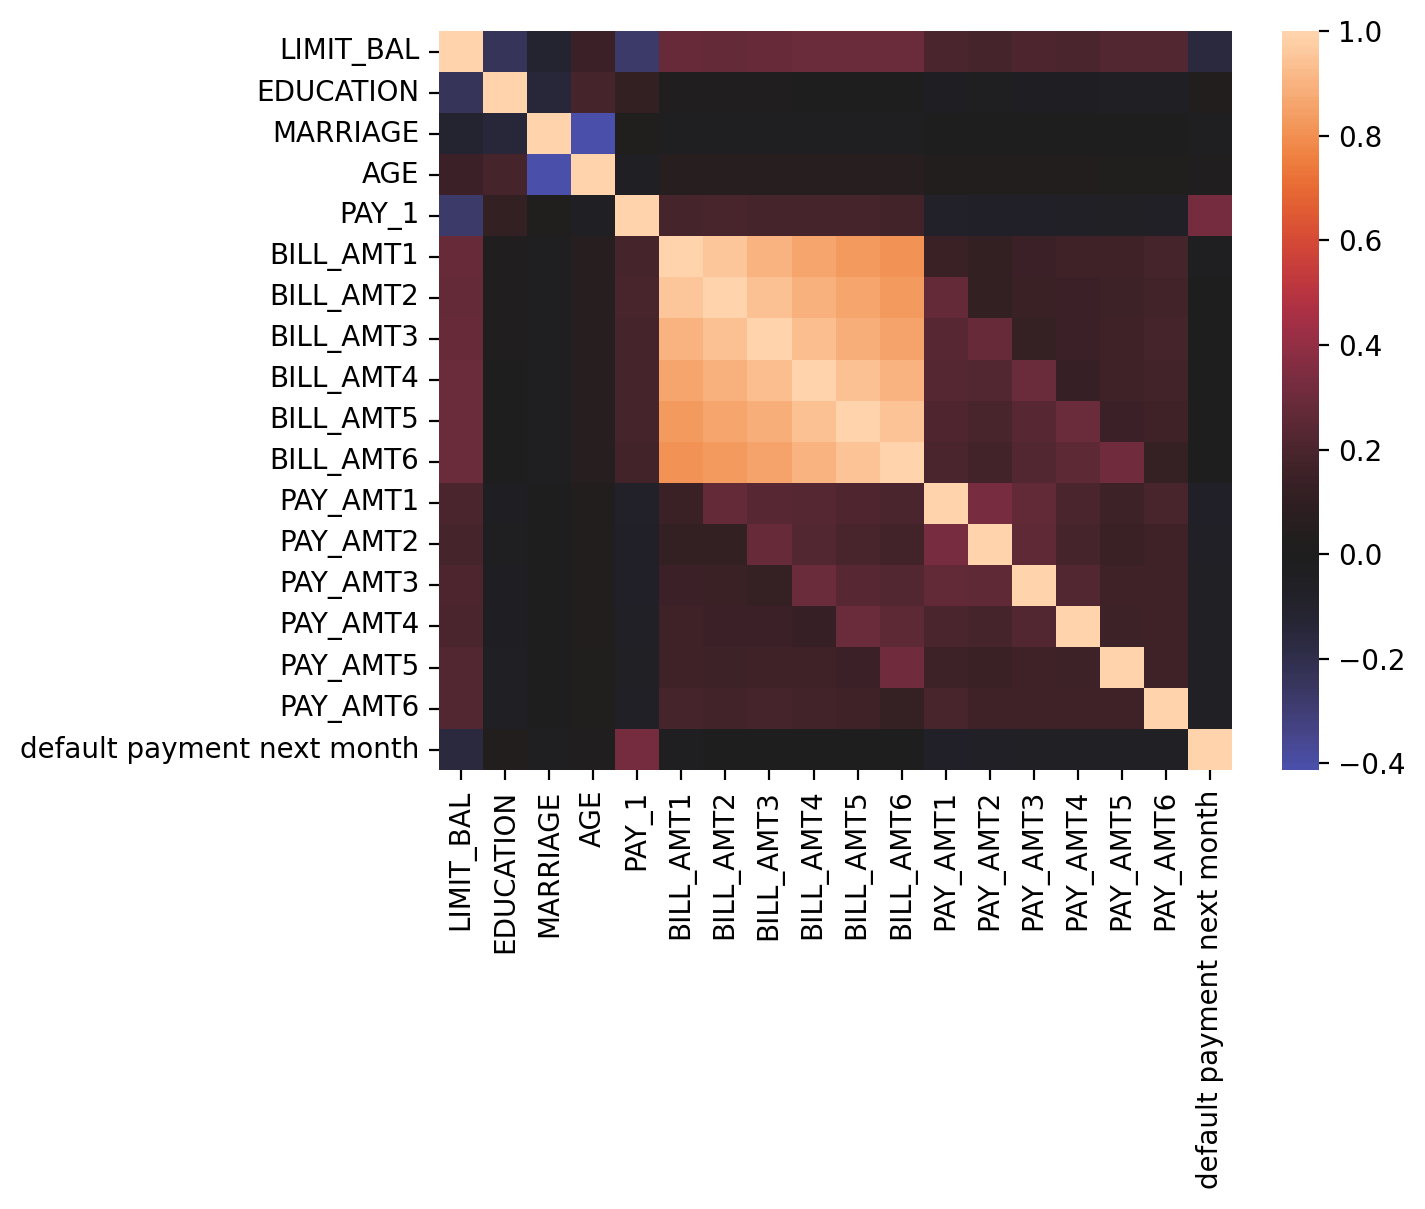

In [10]:
sns.heatmap(corr, 
           xticklabels = corr.columns.values, 
           yticklabels = corr.columns.values,
           center = 0)

In [11]:
#pd.plotting.scatter_matrix(df[features_response])

## ANOVA F-Test
#### (Analysis of Variance)

In [12]:
X = df[features_response].iloc[:,:-1]
y = df[features_response].iloc[:,-1]
print(X.shape, y.shape)

(26664, 17) (26664,)


In [13]:
from sklearn.feature_selection import f_classif

In [14]:
f_stat, f_p_value = f_classif(X,y)

In [15]:
f_stat

array([6.51324071e+02, 3.26377679e+01, 1.80780265e+01, 5.47913953e+00,
       3.15667230e+03, 1.12184060e+01, 5.66845420e+00, 5.72293789e+00,
       3.43474047e+00, 1.21608188e+00, 1.04956059e+00, 1.40612679e+02,
       1.01408321e+02, 9.00238734e+01, 7.96400211e+01, 8.58432945e+01,
       8.04207840e+01])

In [16]:
f_p_value

array([5.83836587e-142, 1.12217491e-008, 2.12755520e-005, 1.92520602e-002,
       0.00000000e+000, 8.11022595e-004, 1.72796505e-002, 1.67515708e-002,
       6.38496543e-002, 2.70140911e-001, 3.05617603e-001, 2.35835447e-032,
       8.25612412e-024, 2.54264104e-021, 4.77411188e-019, 2.09011996e-020,
       3.21956535e-019])

In [17]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
                         'F statistic': f_stat,
                         'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [18]:
#sns.set_theme(style= "ticks")
#df_seaborn = corr
#sns.pairplot(df_seaborn)
# this works :)

In [19]:
from sklearn.feature_selection import SelectPercentile

In [20]:
selector = SelectPercentile(f_classif, percentile = 20)

In [21]:
selector.fit(X,y)

SelectPercentile(percentile=20)

In [22]:
best_feature_ix = selector.get_support()
best_feature_ix 

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [23]:
features = features_response[:-1]

In [24]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
    
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [25]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [26]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


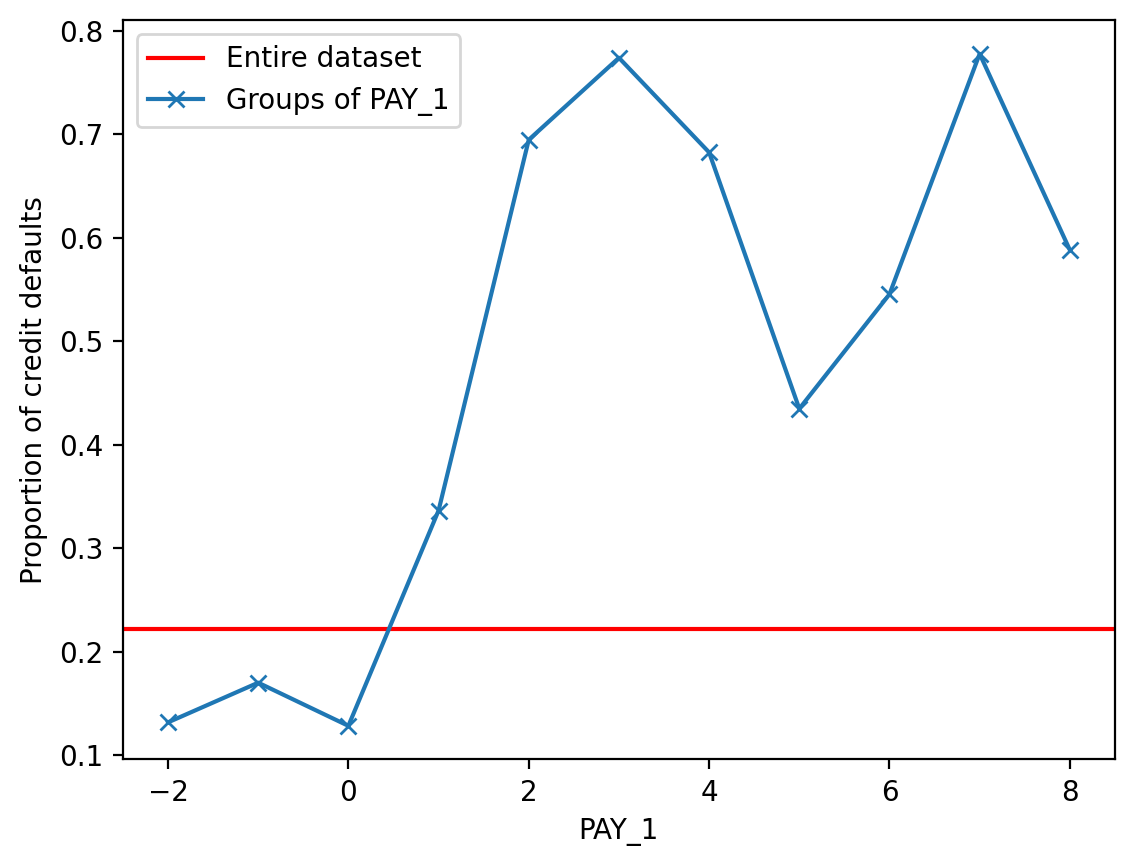

In [27]:
axes = plt.axes()
axes.axhline(overall_default_rate, color = 'red')
group_by_pay_mean_y.plot(marker = 'x', legend = False, ax = axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])


In [28]:
pos_mask = y == 1
neg_mask = y == 0
pos_mask

0         True
1         True
2        False
3        False
4        False
         ...  
26659    False
26660    False
26661     True
26662     True
26663     True
Name: default payment next month, Length: 26664, dtype: bool

Text(0.5, 1.0, 'Credit limits by response variable')

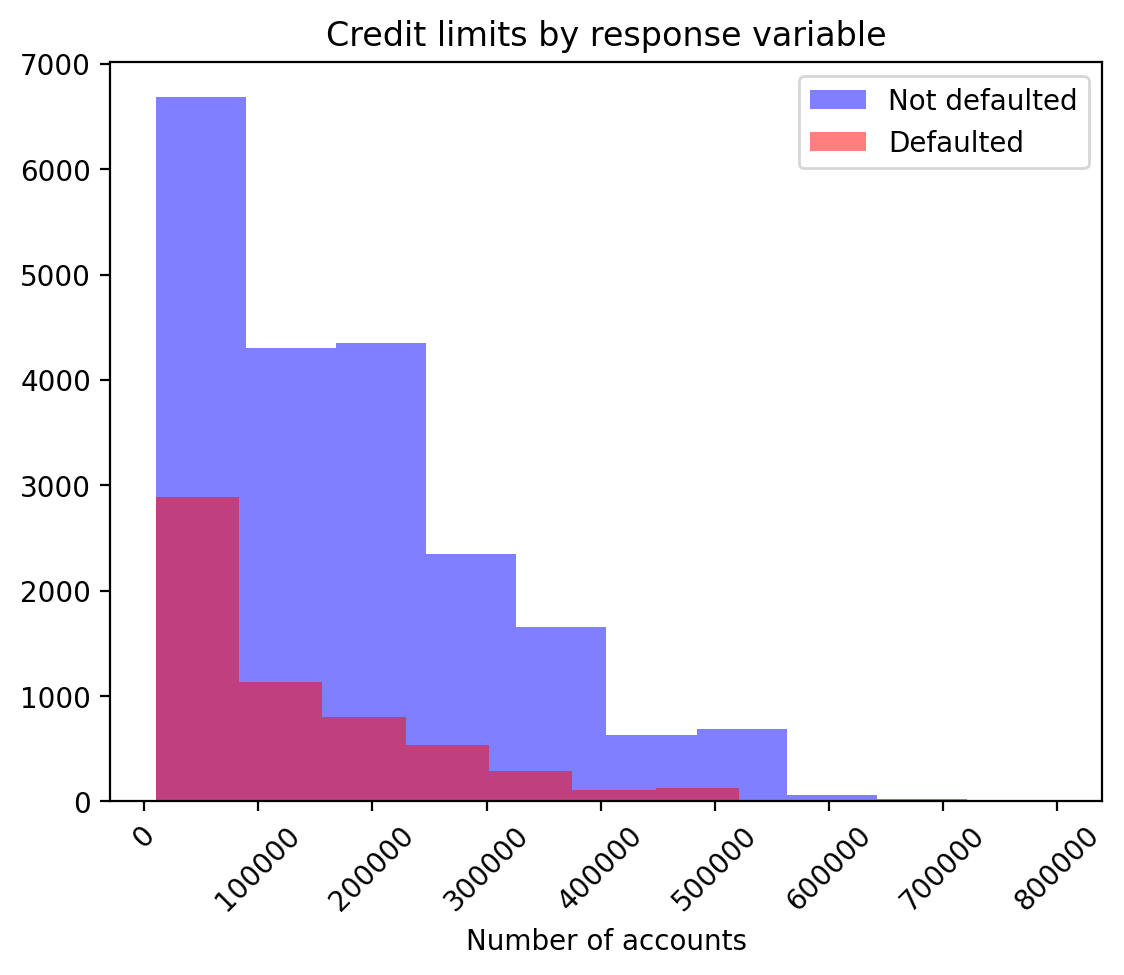

In [29]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'red')
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_xlabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [30]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


C:\Users\Box\AppData\Local\Temp\ipykernel_4916\1173426162.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

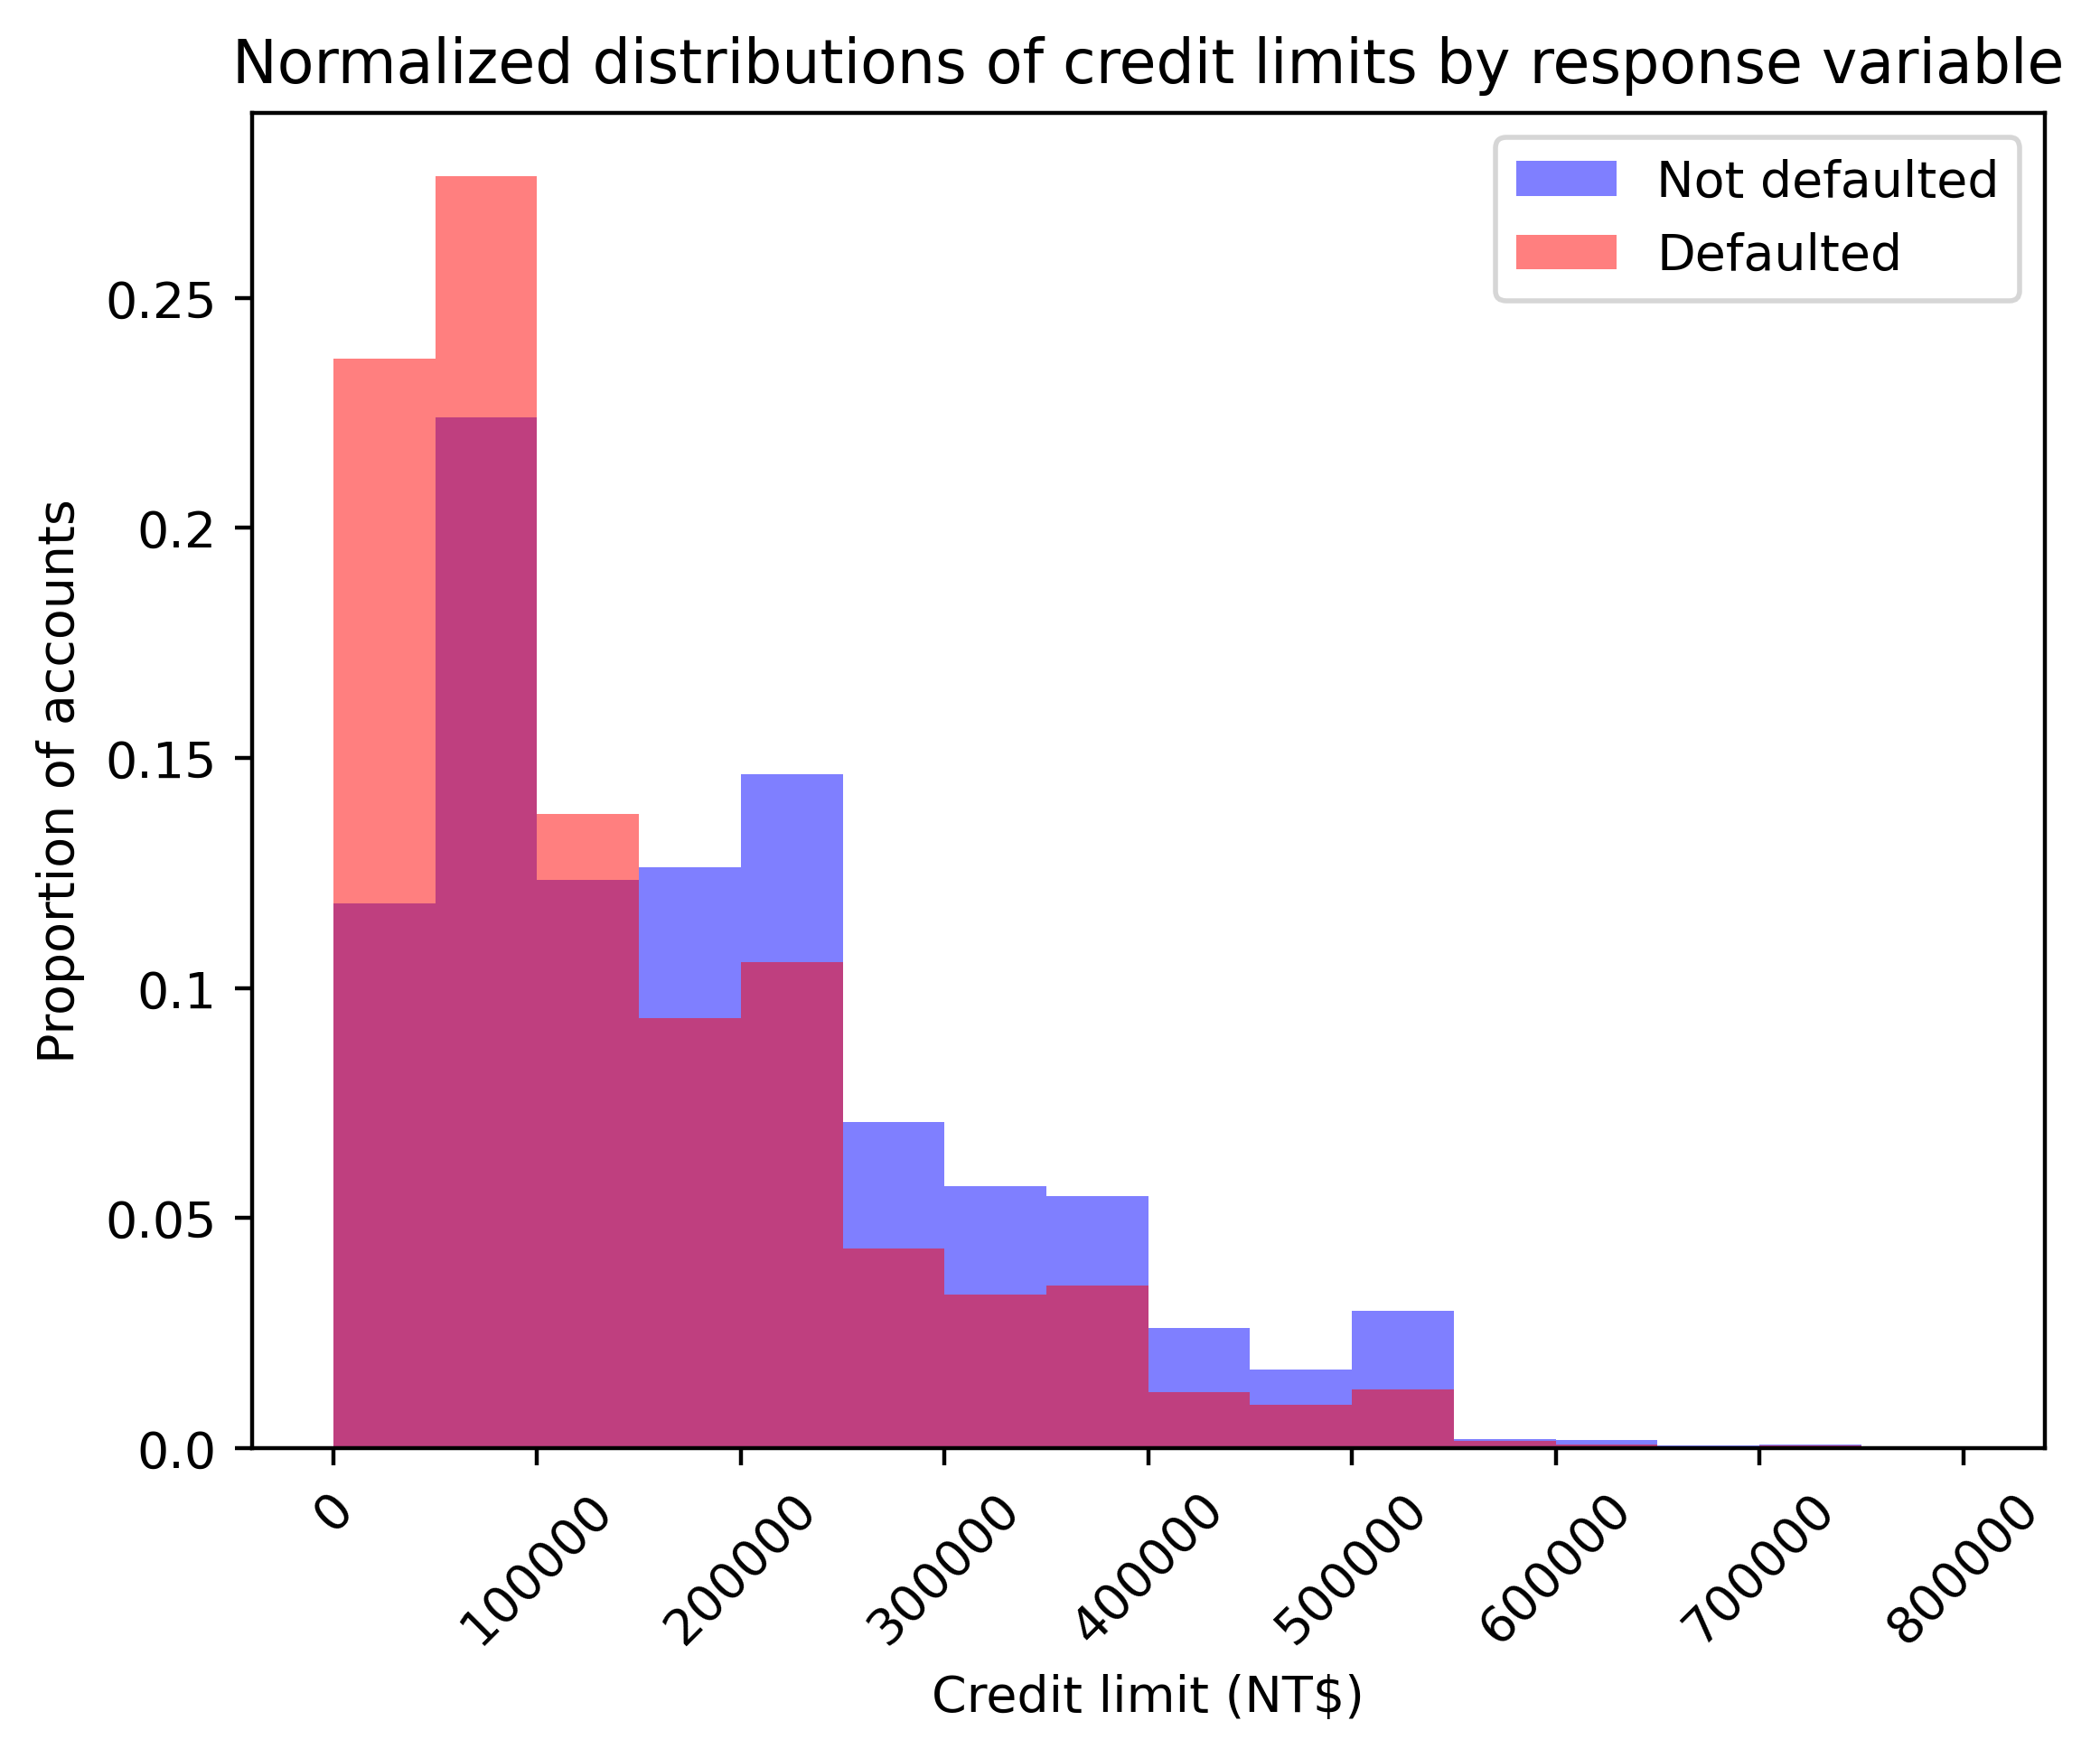

In [31]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins = bin_edges, alpha = 0.5, density = True , color = 'blue')
"""density = True turns histogramm from absolite values to normalized scale. y labels still need to be adjusted"""
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins = bin_edges, alpha = 0.5, density = True, color = 'red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')
# https://matplotlib.org/stable/api/axes_api.html

### Visual communication of quantitative concepts is a core data science skill.

## Before: Univariate feature anaylsis. Now: Multivariate, i.e. considering interactions!

# Feature Engineering(!)

Up until now: only one feature at a time (no interactions) and no prior transformation (only linear dependencies). 

Tansformations like: polynomial, logarithmic, binning (discretization)

Random forest?

In [32]:
np.exp(1)

2.718281828459045

In [33]:
np.exp(0)

1.0

In [34]:
X_exp = np.linspace(-4, 4, 81) 
# np.linspace works like range. The third value specifies the number of values inbetween First and second, produces decimals
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


Text(0.5, 1.0, 'Plot of $e^X$')

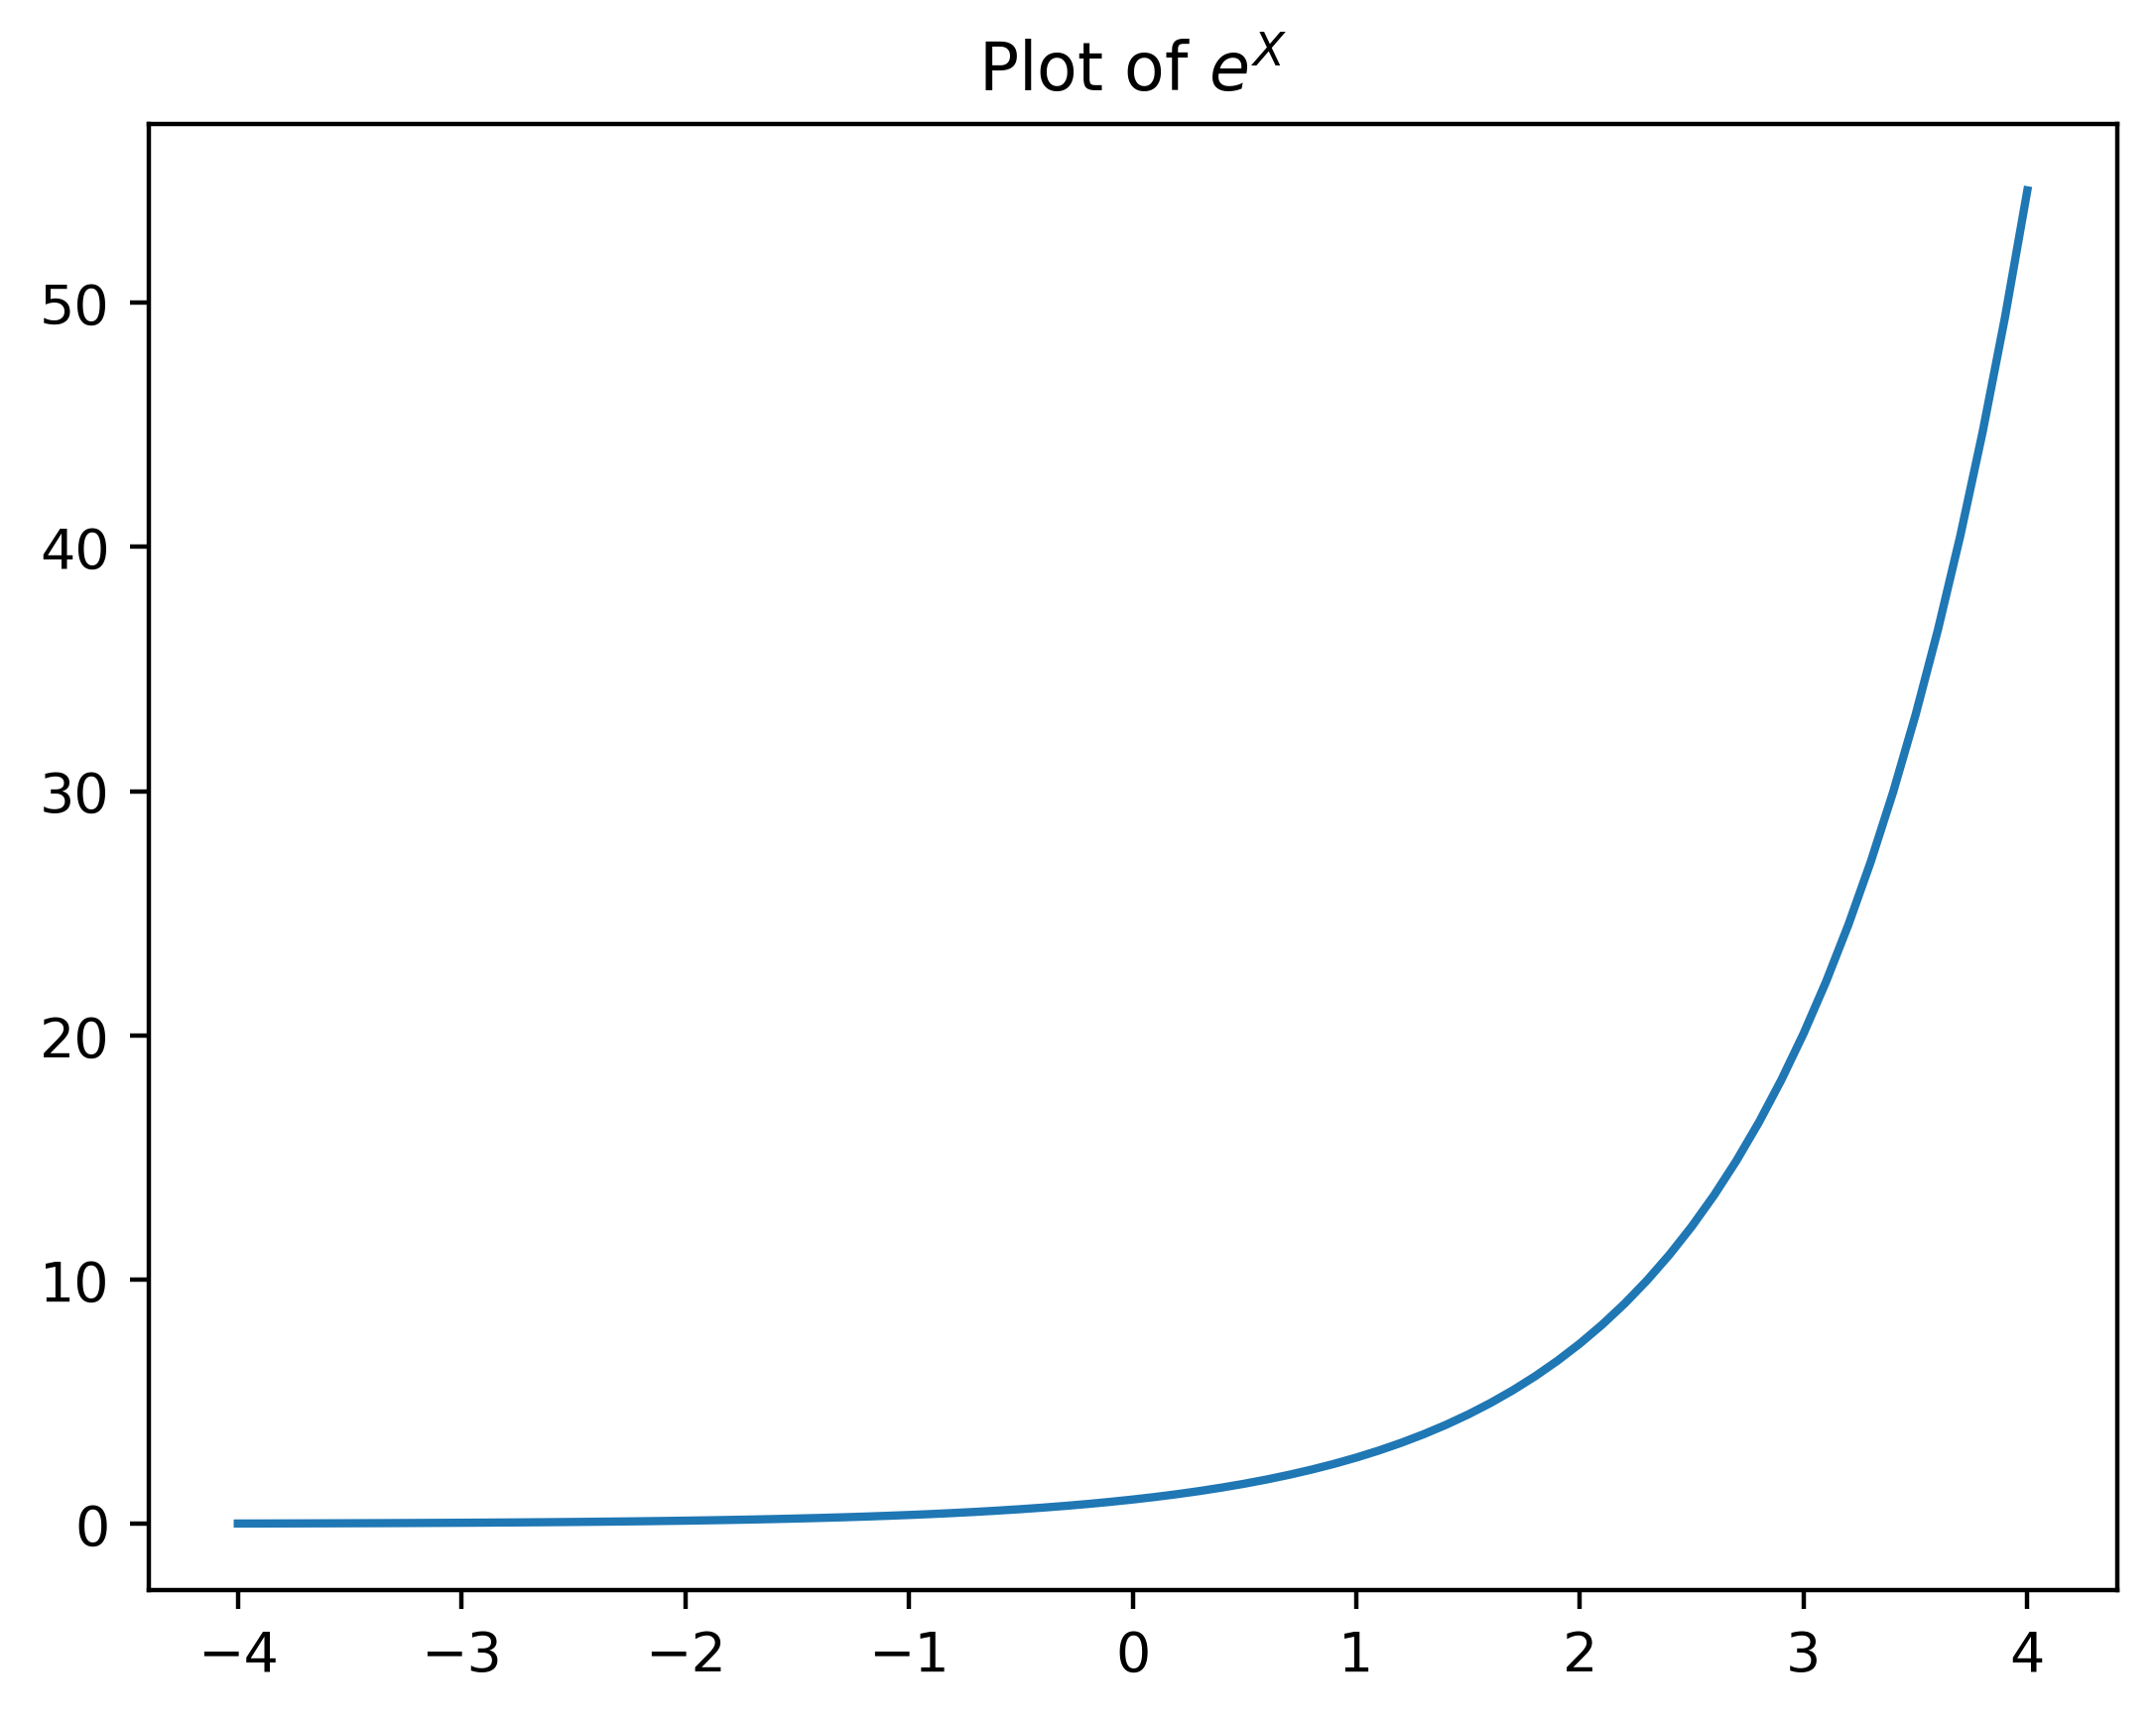

In [35]:
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')


In [36]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^{-X}$')

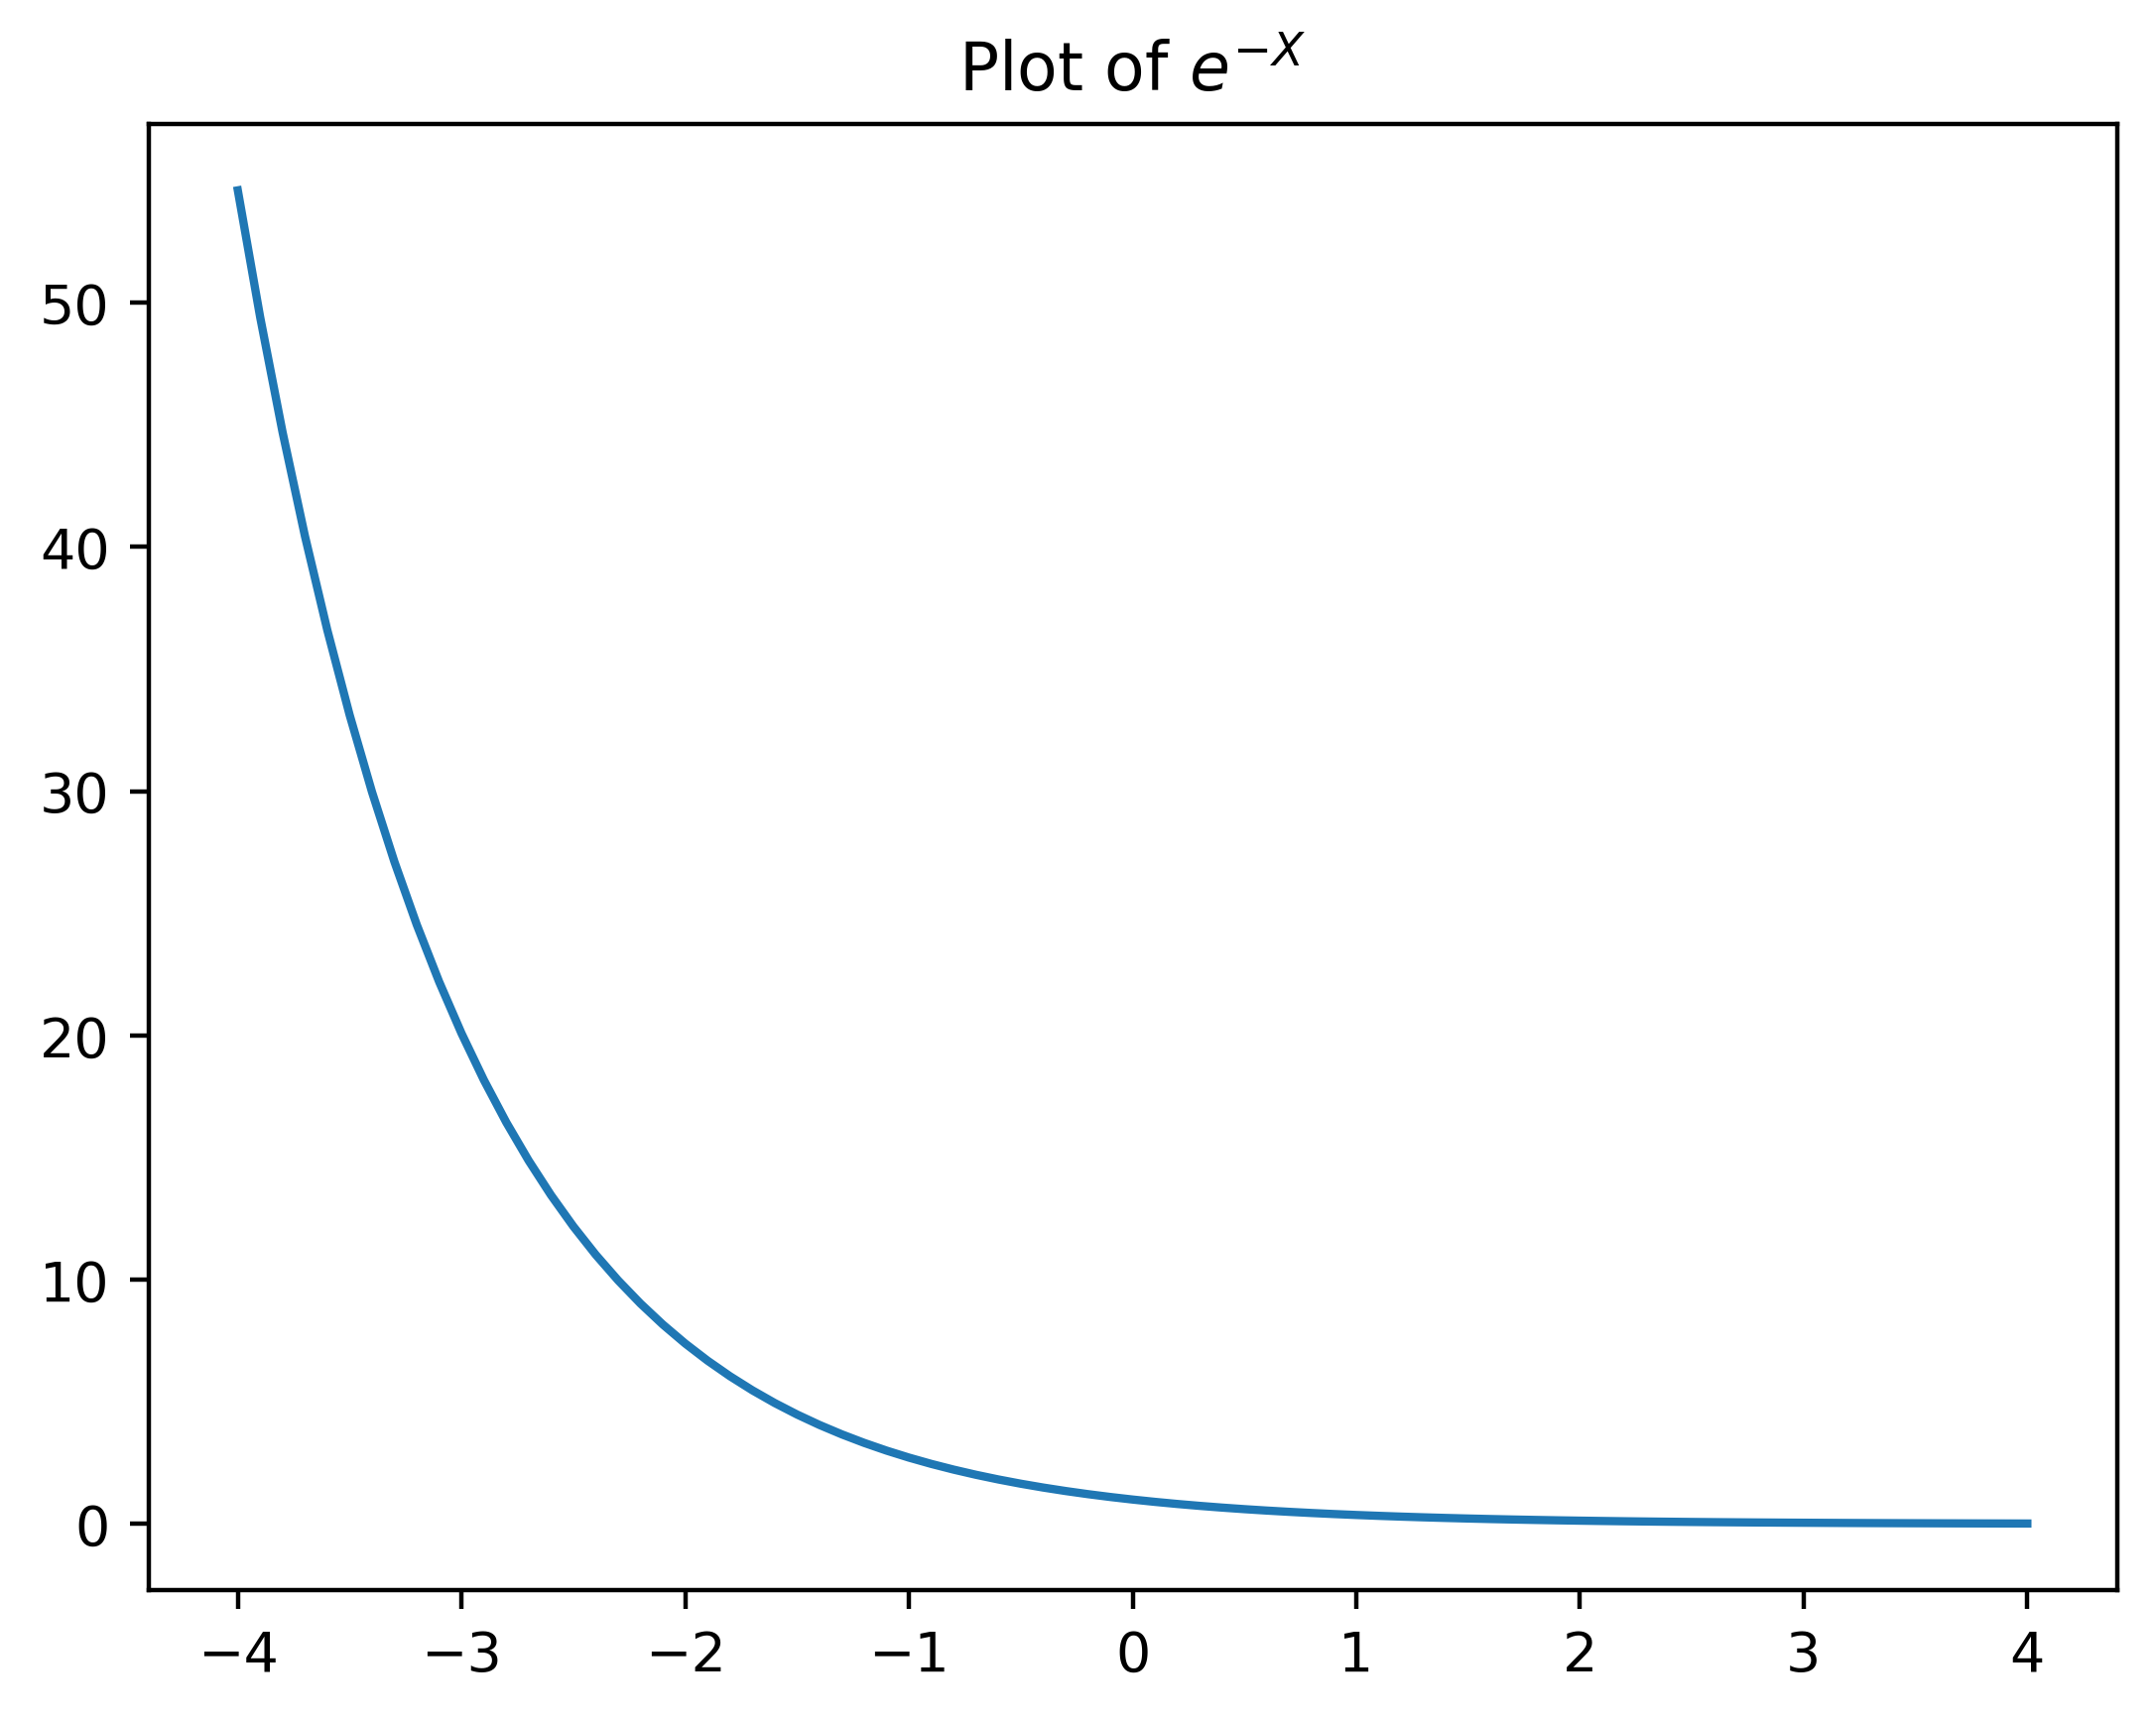

In [37]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [38]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

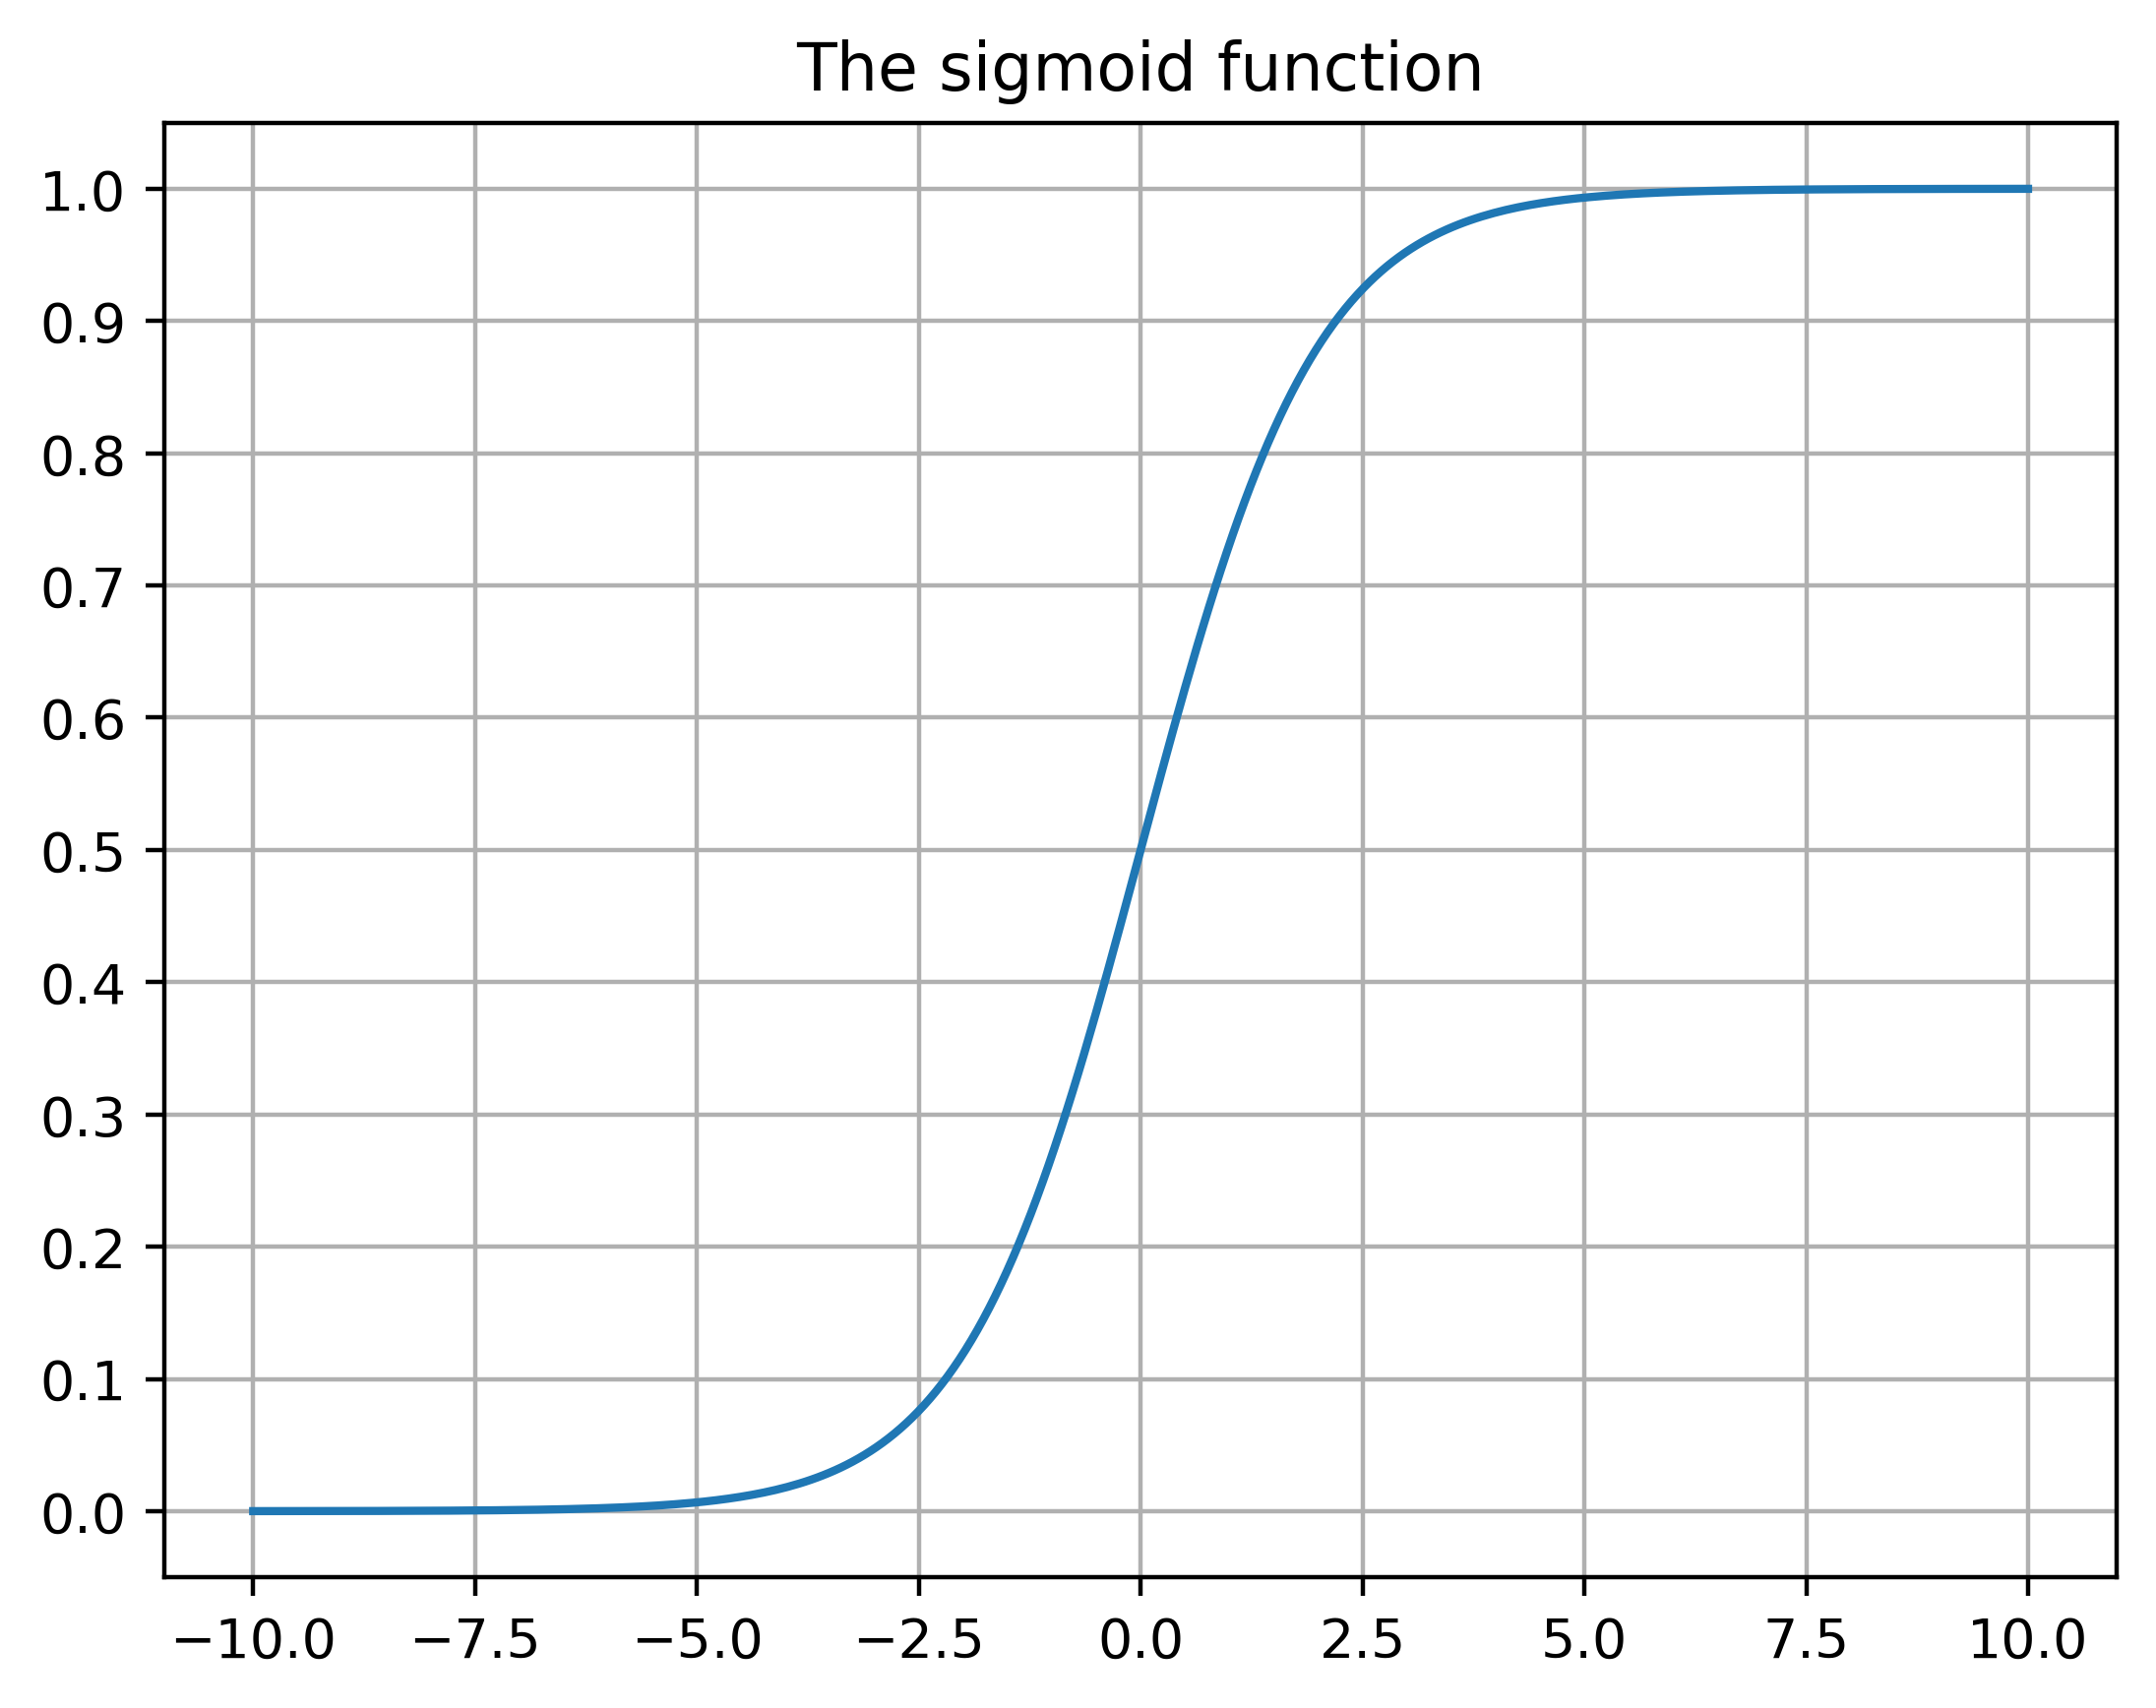

In [39]:
X_sig = np.linspace(-10, 10, 300)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

In [40]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [41]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [42]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [43]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

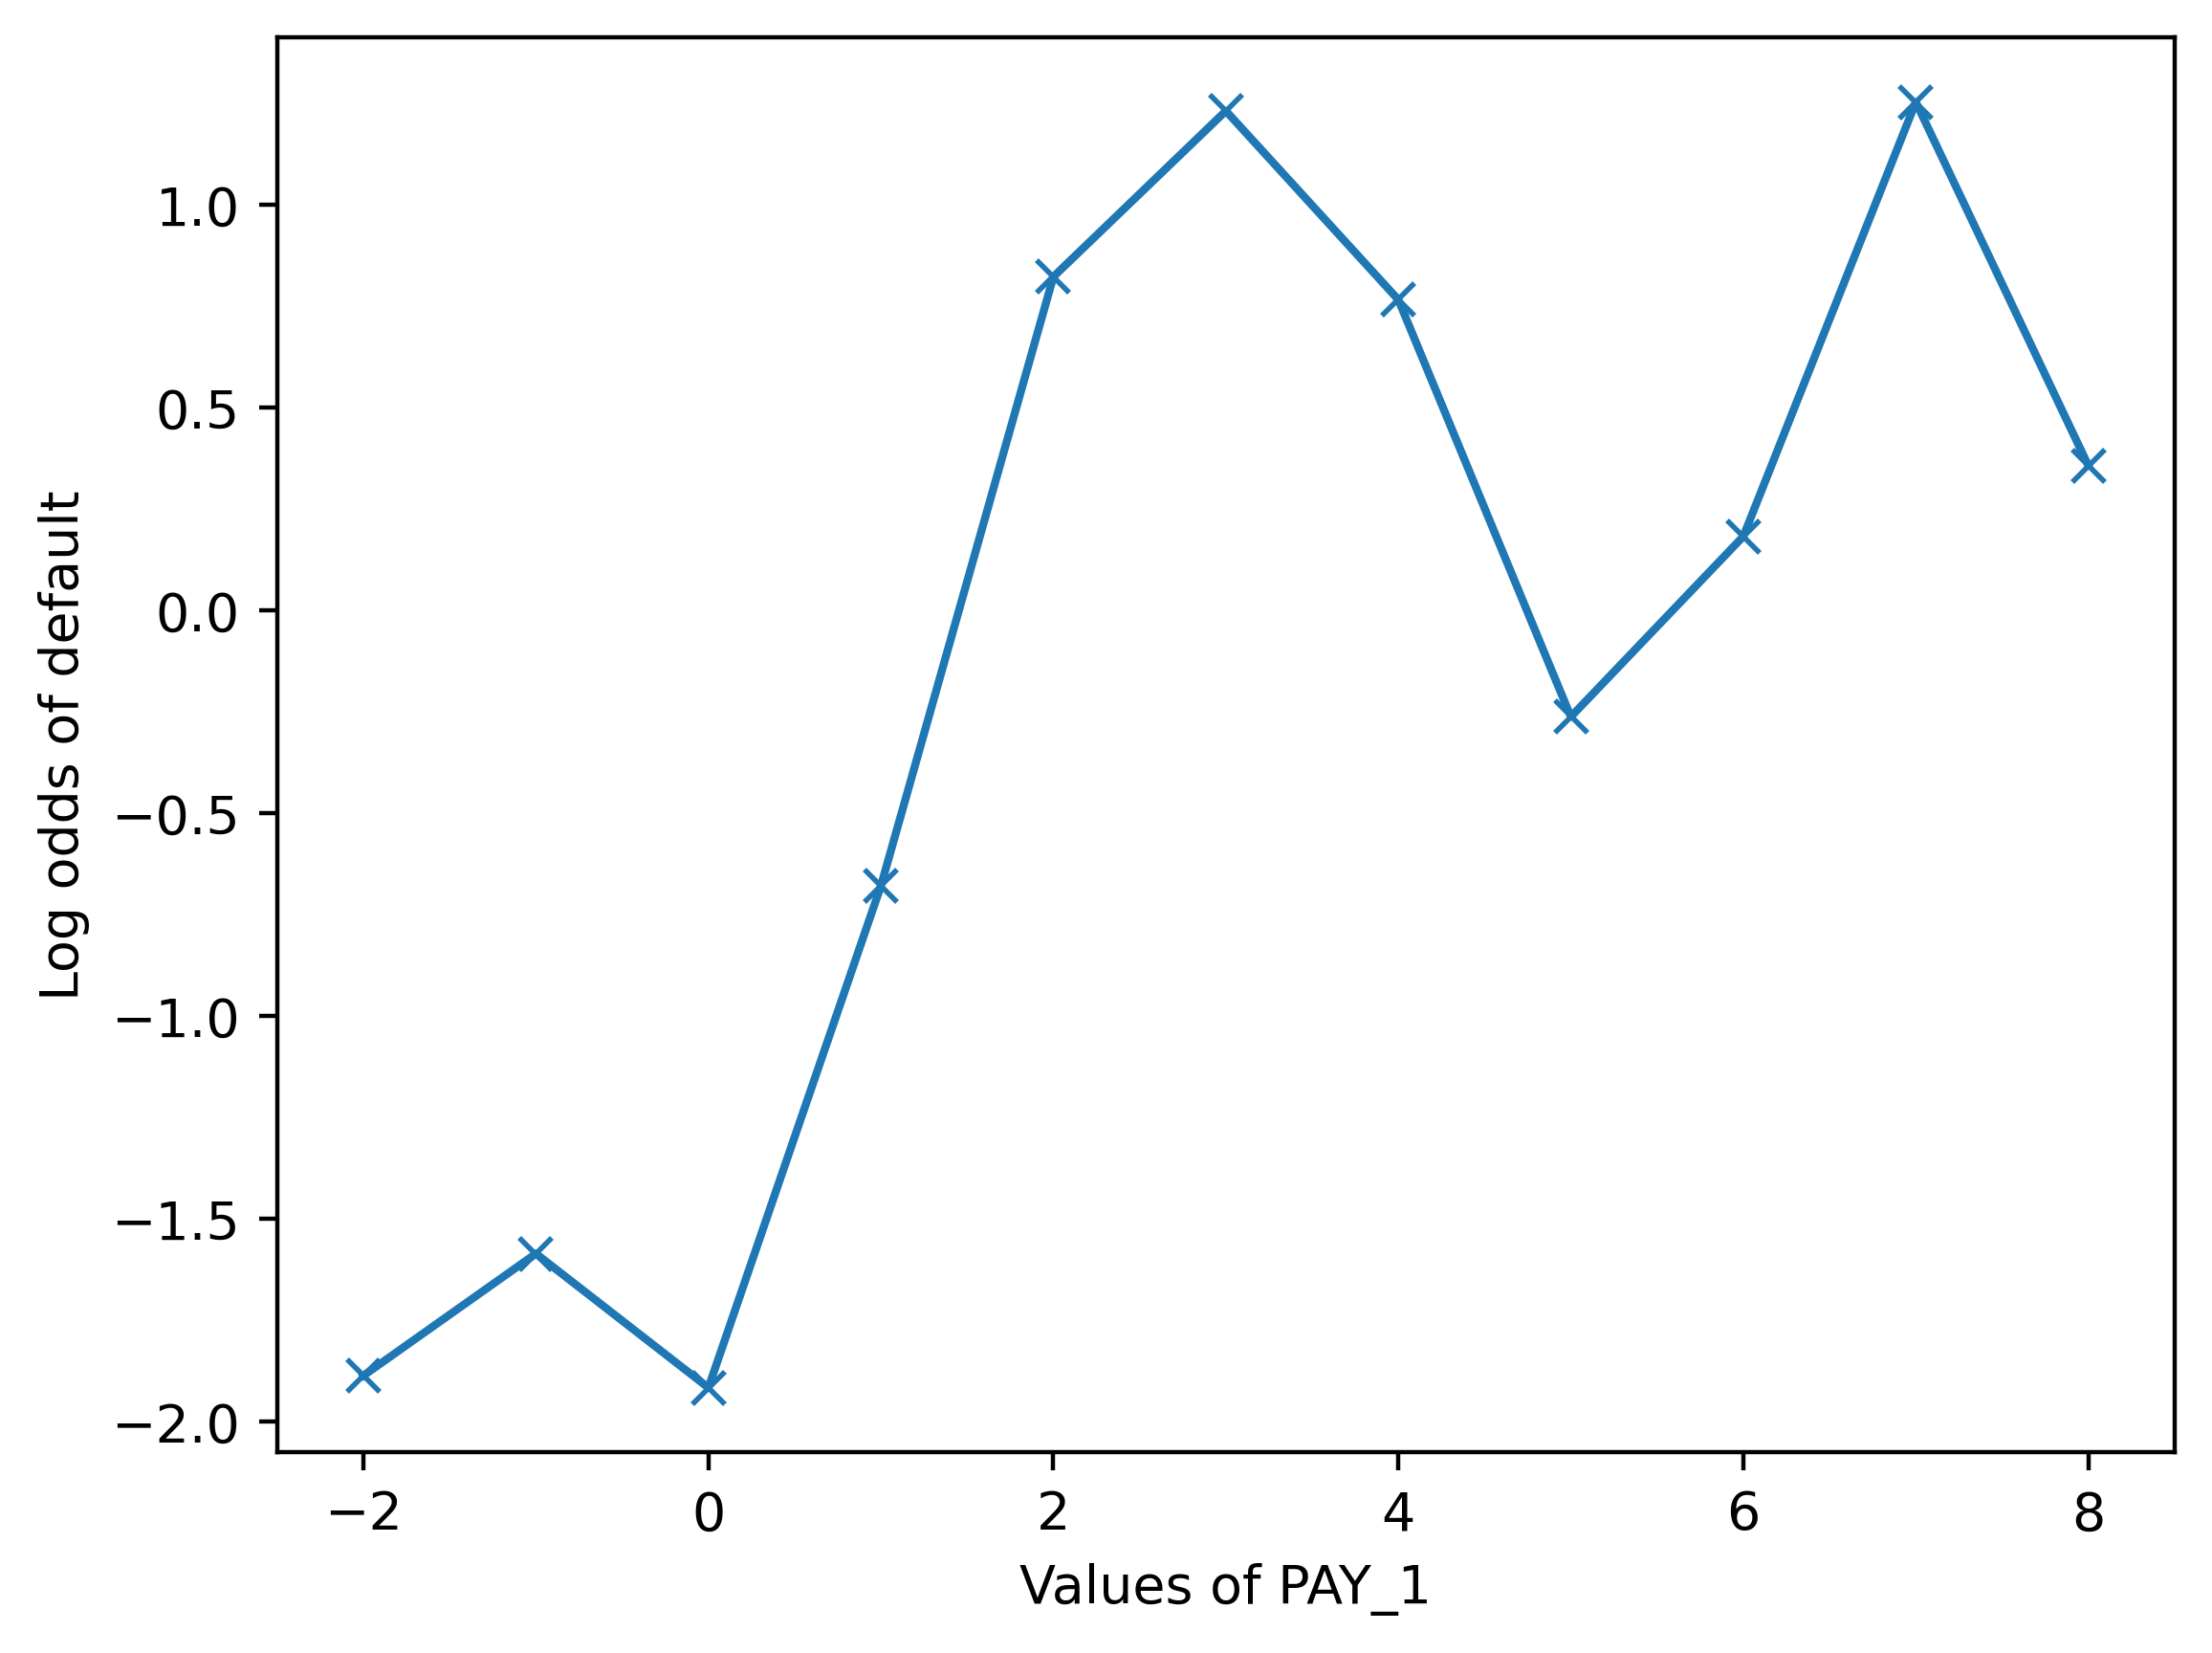

In [44]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
# '-x' denotes Crosses for the points and lines inbetween. Add '-xr' for red color. Default is blue
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [49]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[:3]) # don't need a 0 there
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


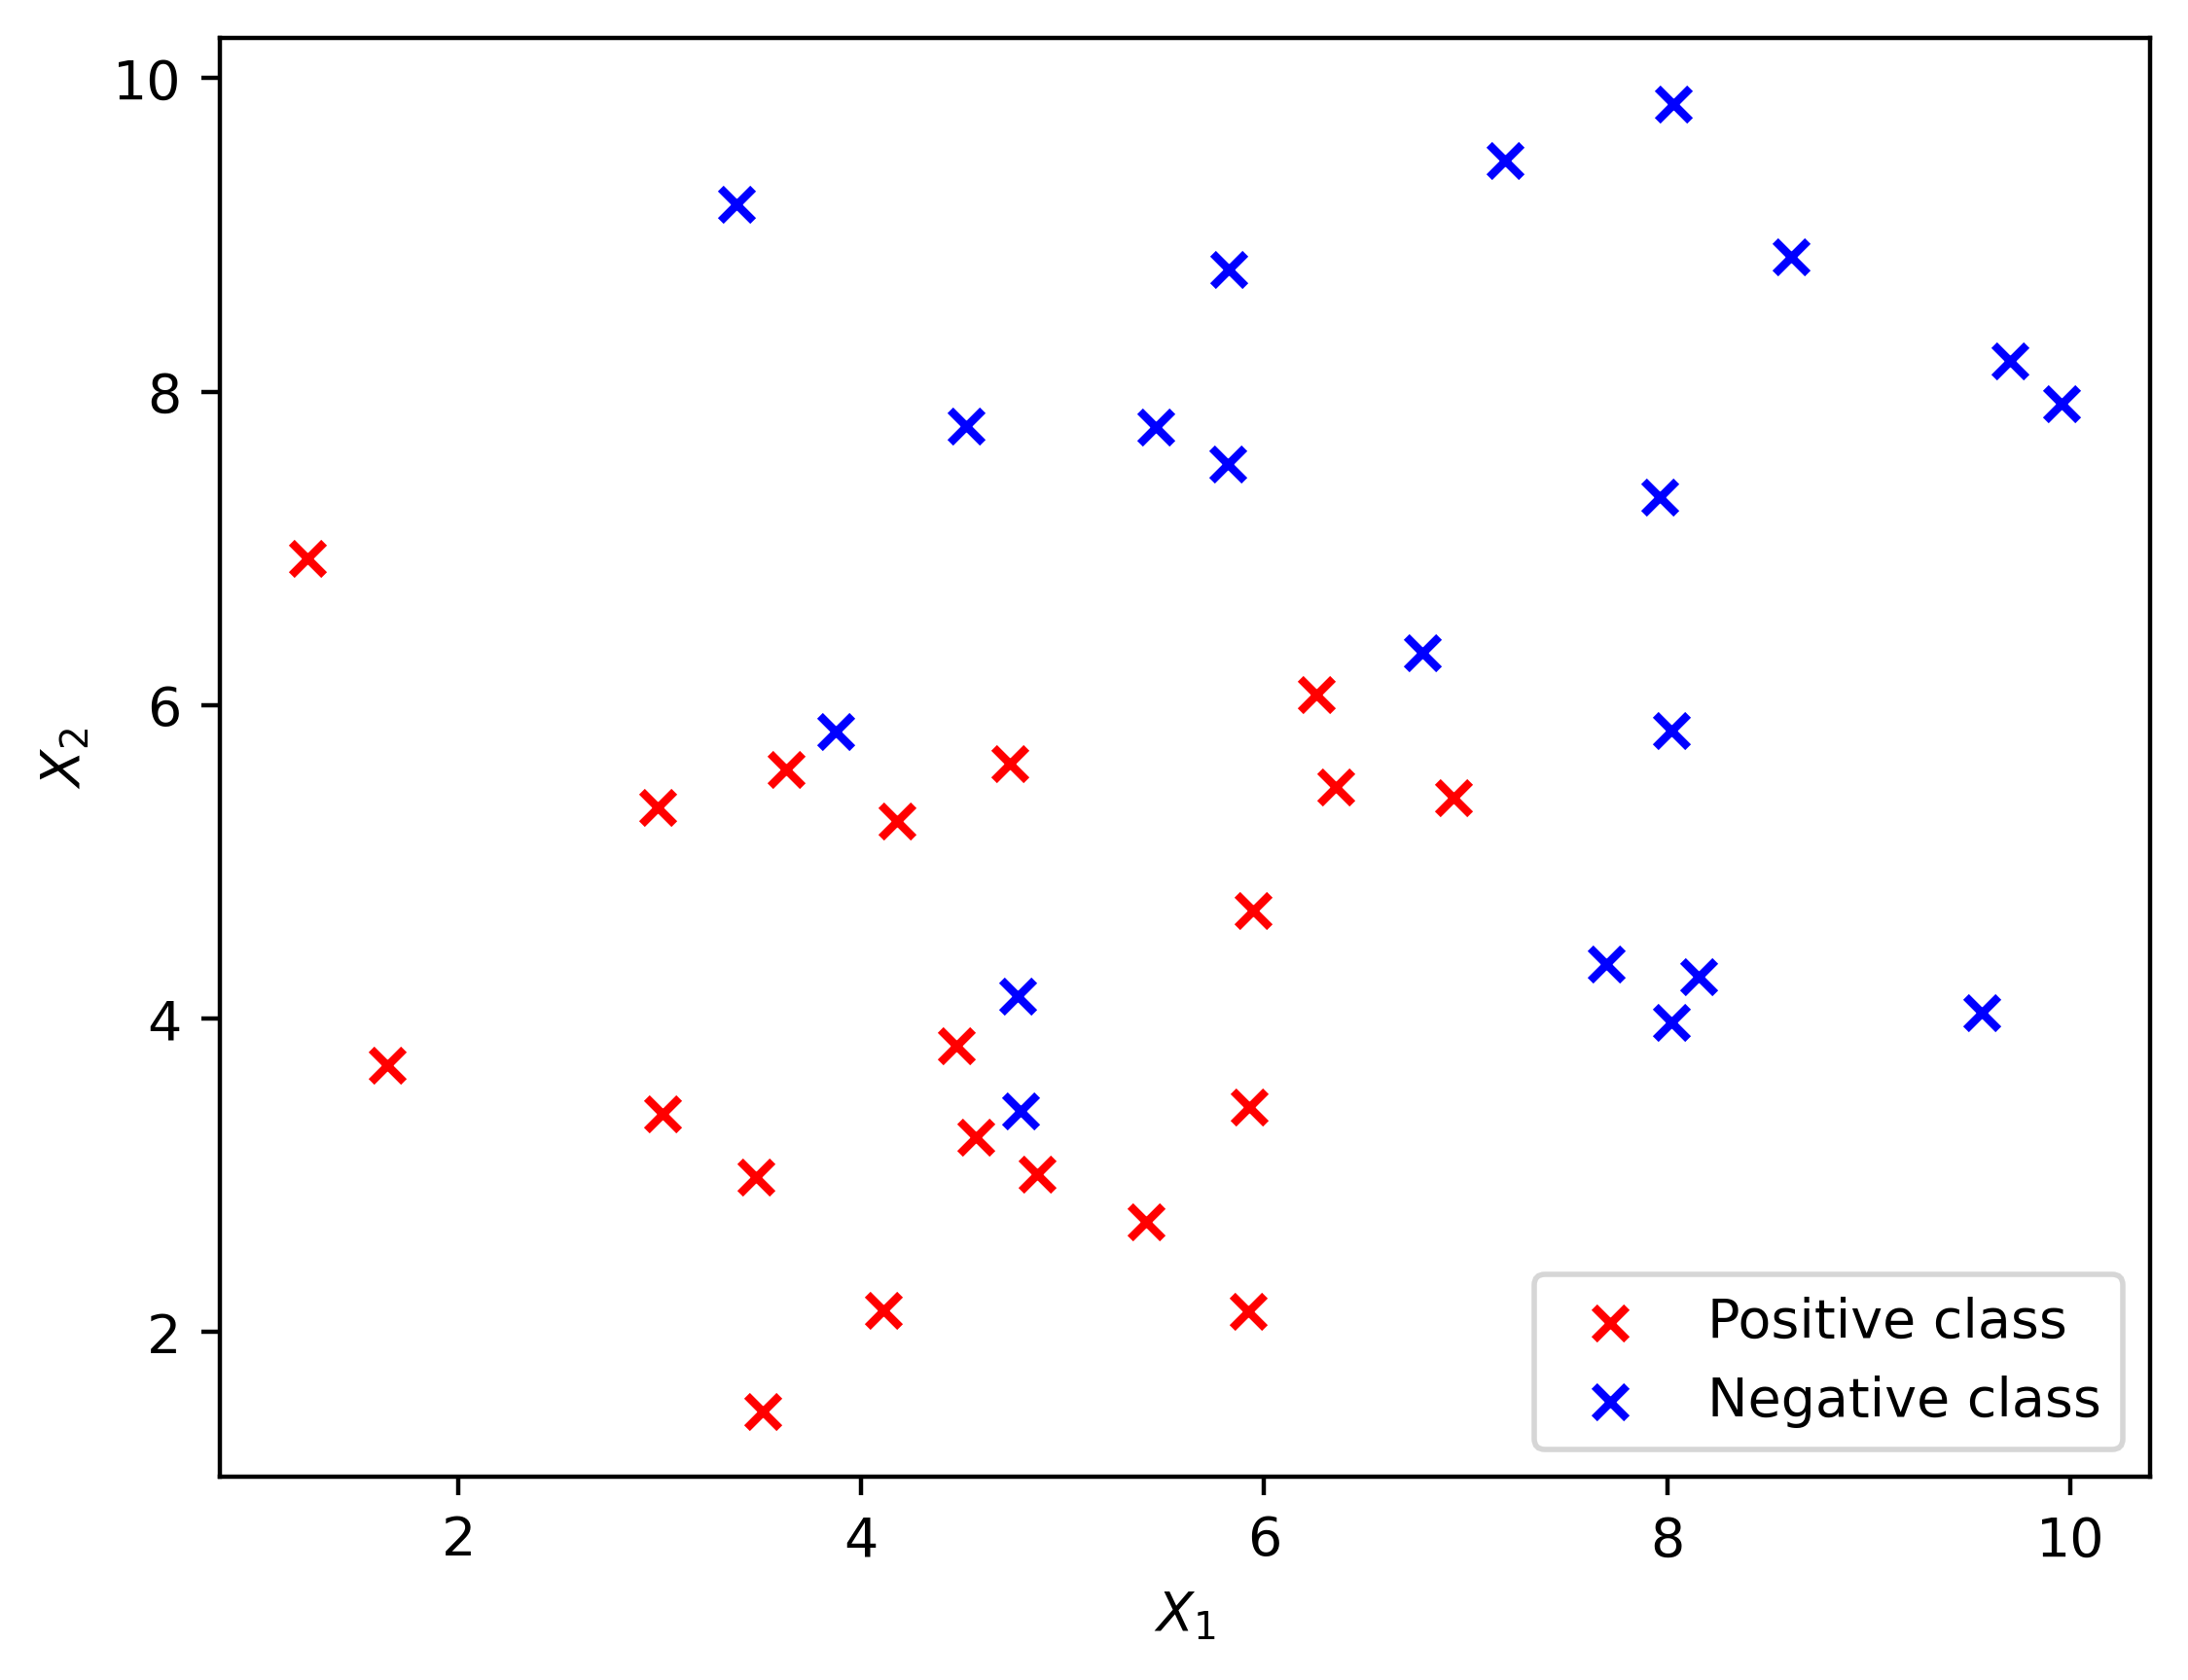

In [50]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [51]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [52]:
# scikit learn expects xx???
# therefore adding response variable as vertical stack
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [55]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [56]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

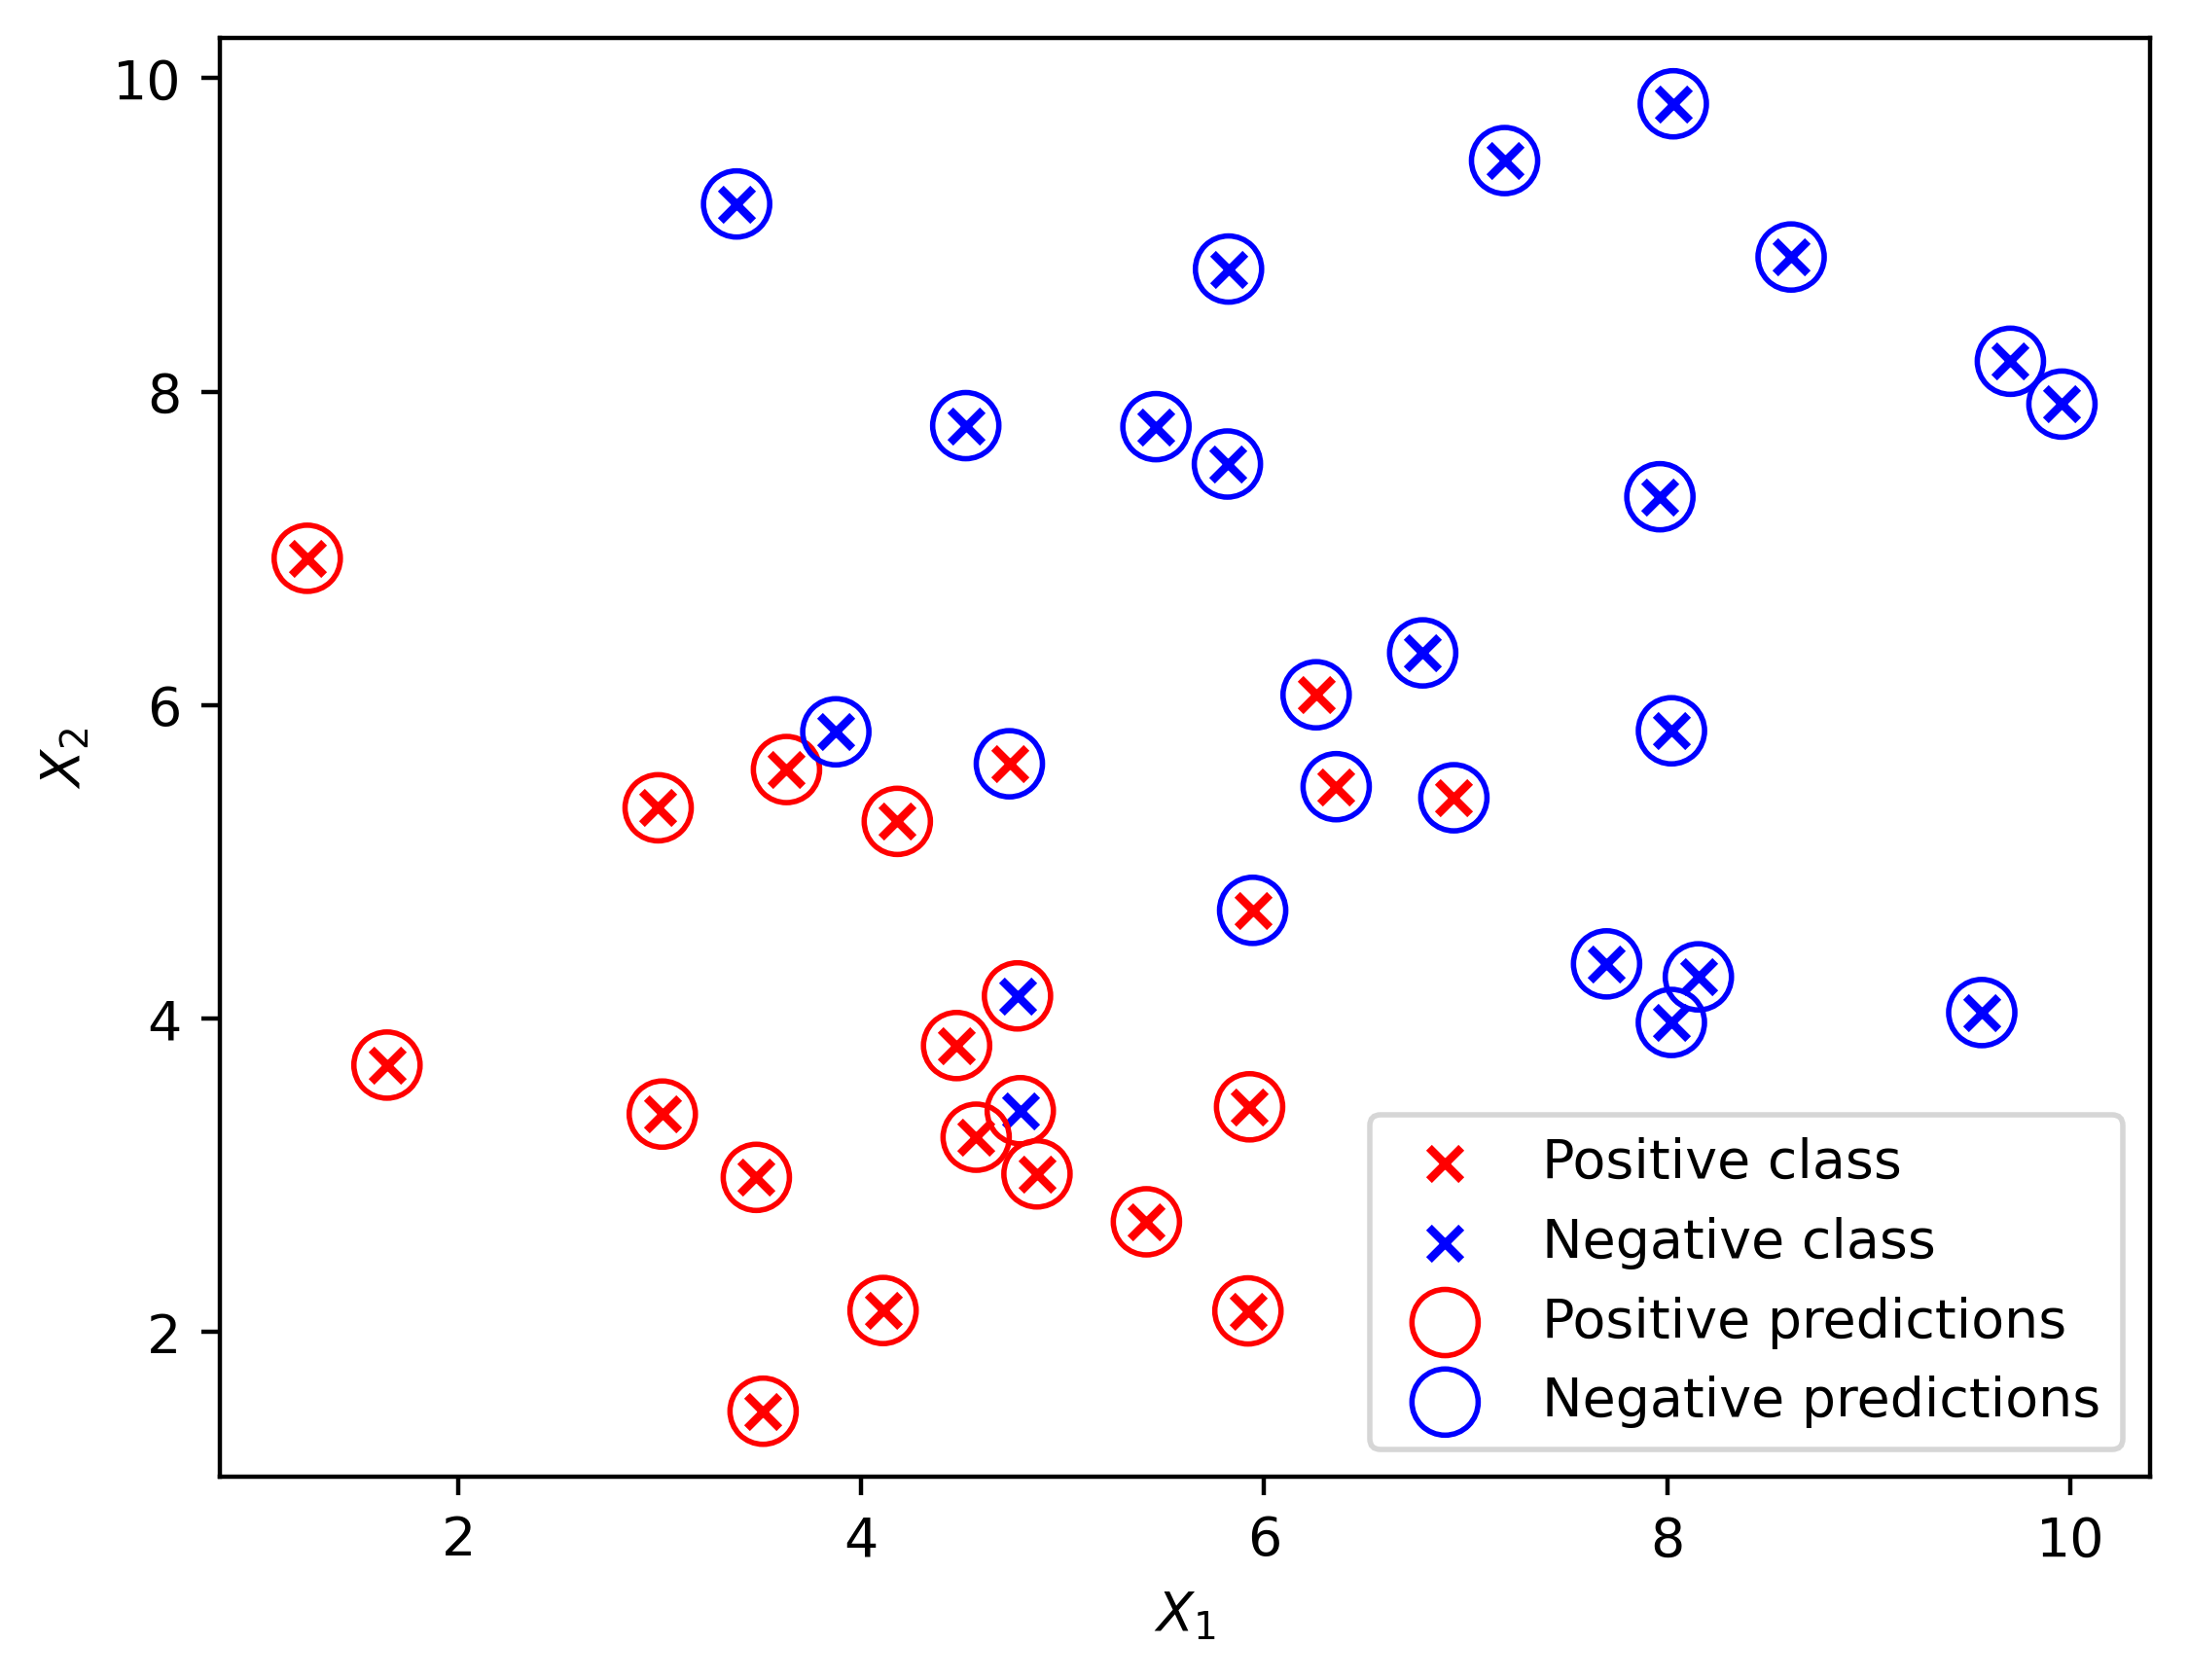

In [57]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150,marker='o', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150,marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions',
'Negative predictions'])

In [58]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285847 -0.2533642362677322


In [59]:
theta_0 = example_lr.intercept_

In [61]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary -(theta_0/theta_2)

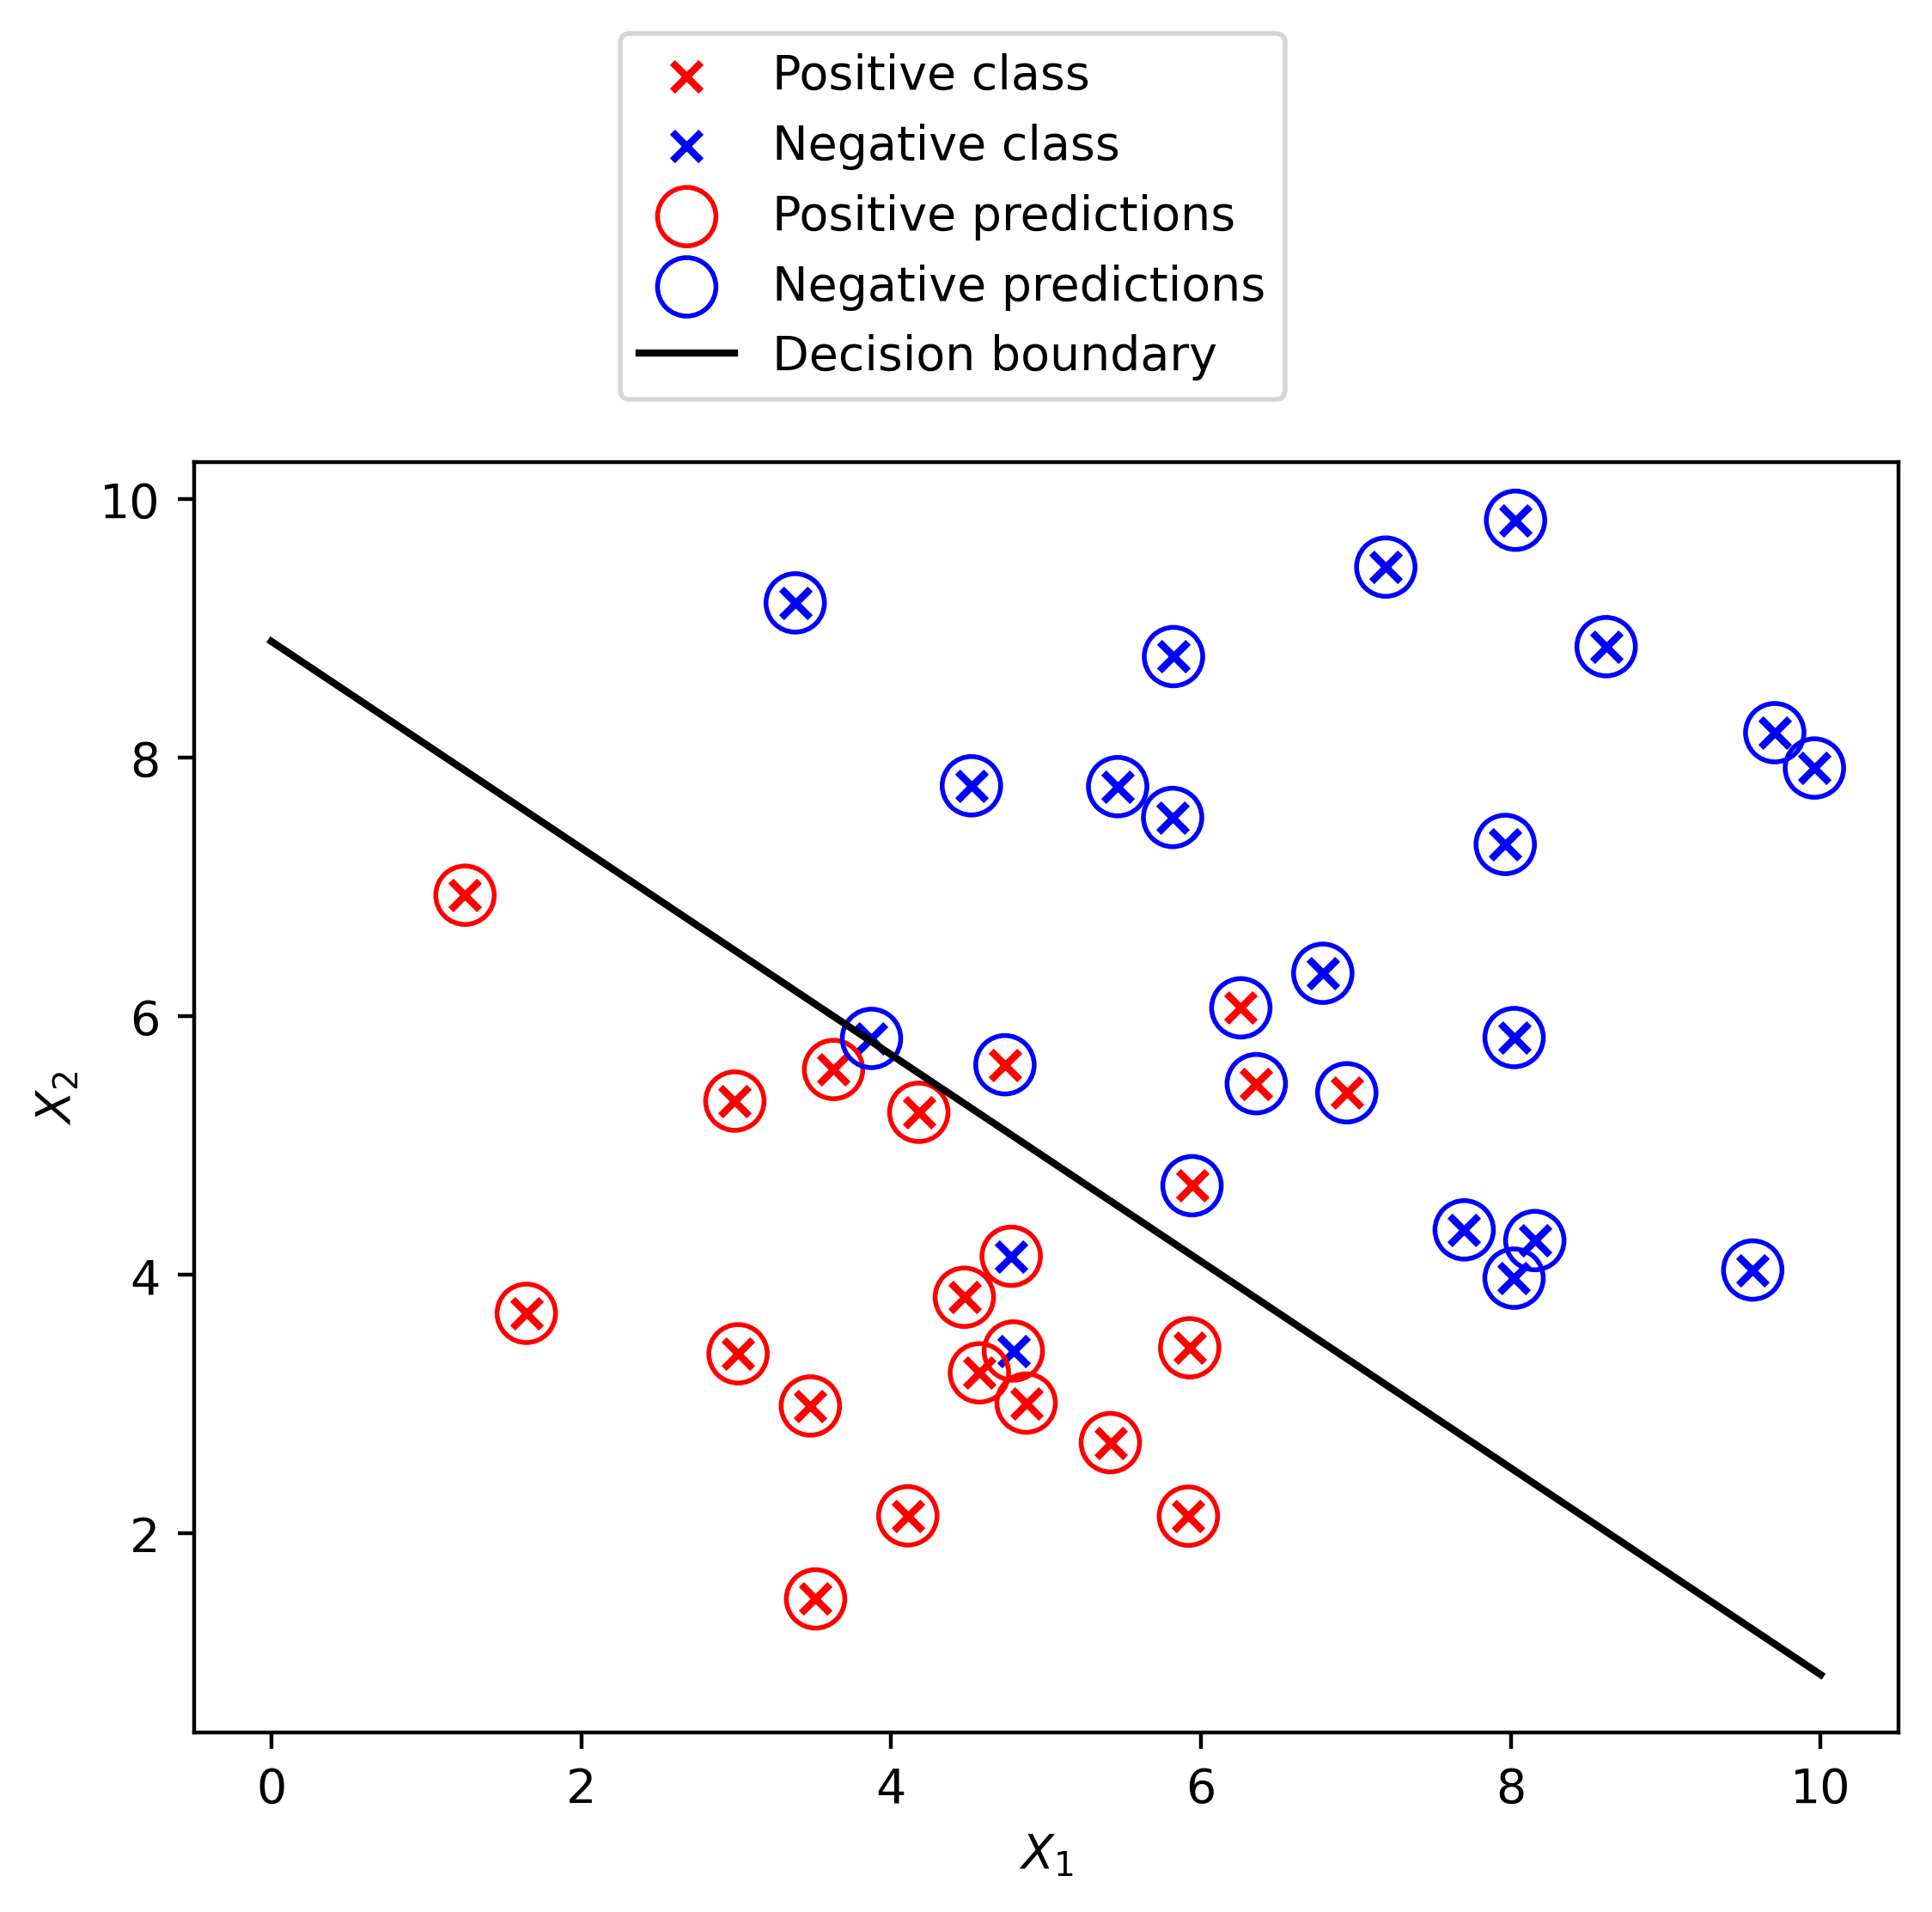

In [62]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x',label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x',label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1],s=150, marker='o', edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1],s=150, marker='o', edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-',label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

### Activity 3 | Fitting a Logistic Regression Model and using Coefficients

#### Train/ Test split

In [73]:
df = pd.read_csv('C:/Users/Box/Documents/Ebooks/Data Science/Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [74]:
features_response = df.columns.tolist()

In [75]:
items_to_keep = ['default payment next month', 'PAY_1', 'LIMIT_BAL']
features_response = [item for item in features_response if item in items_to_keep]
features_response

['LIMIT_BAL', 'PAY_1', 'default payment next month']

In [76]:
    from sklearn.model_selection import train_test_split

In [100]:
#X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(df['PAY_1'].values.reshape(-1,1), df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values.reshape(-1,1), test_size=0.2)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values, test_size = 0.2)

In [118]:
print(y_train.shape, y_test.shape)
print(X_train)

(21331,) (5333,)
[[    -2 240000]
 [    -1 260000]
 [    -1 180000]
 ...
 [     0  30000]
 [     0  50000]
 [     2  50000]]


In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg

LogisticRegression(solver='liblinear')

In [121]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [123]:
y_pred = log_reg.predict(X_test)

In [124]:
y_pred_proba = log_reg.predict_proba(X_test)

In [125]:
print(log_reg.coef_, log_reg.intercept_)

[[ 8.20445495e-11 -6.81393338e-06]] [-6.50386392e-11]


In [126]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)